In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

shuffled_tsv = './BRALIBASE-SHUFFLED-k2-rnafold-energies.tsv'
unshuffled_tsv = './BRALIBASE-k2-rnafold-energies.tsv'

df_shuffled = pd.read_csv(shuffled_tsv,sep='\t',names=['id','energy'])
df_unshuffled = pd.read_csv(unshuffled_tsv,sep='\t',names=['id','energy'])

In [2]:
df_merge = pd.merge(df_unshuffled,df_shuffled,left_on='id',right_on='id',suffixes=['_notshuffled','_shuffled'])
df_merge['fasta_name']=df_merge['id'].str.replace('.rnafold','')
df_merge

,id,energy_notshuffled,energy_shuffled,fasta_name
0,5_8S_rRNA.apsi-50.sci-67.no-1.raw.fa.rnafold,-46.90,-41.50,5_8S_rRNA.apsi-50.sci-67.no-1.raw.fa
1,5_8S_rRNA.apsi-52.sci-72.no-1.raw.fa.rnafold,-38.00,-37.70,5_8S_rRNA.apsi-52.sci-72.no-1.raw.fa
2,5_8S_rRNA.apsi-55.sci-72.no-1.raw.fa.rnafold,-52.90,-54.25,5_8S_rRNA.apsi-55.sci-72.no-1.raw.fa
3,5_8S_rRNA.apsi-56.sci-71.no-1.raw.fa.rnafold,-43.50,-46.45,5_8S_rRNA.apsi-56.sci-71.no-1.raw.fa
4,5_8S_rRNA.apsi-57.sci-67.no-1.raw.fa.rnafold,-39.60,-39.85,5_8S_rRNA.apsi-57.sci-67.no-1.raw.fa
5,5_8S_rRNA.apsi-57.sci-76.no-1.raw.fa.rnafold,-53.55,-54.55,5_8S_rRNA.apsi-57.sci-76.no-1.raw.fa
6,5_8S_rRNA.apsi-59.sci-66.no-1.raw.fa.rnafold,-39.25,-34.60,5_8S_rRNA.apsi-59.sci-66.no-1.raw.fa
7,5_8S_rRNA.apsi-59.sci-71.no-1.raw.fa.rnafold,-44.25,-43.55,5_8S_rRNA.apsi-59.sci-71.no-1.raw.fa
8,5_8S_rRNA.apsi-59.sci-74.no-1.raw.fa.rnafold,-37.40,-36.65,5_8S_rRNA.apsi-59.sci-74.no-1.raw.fa
9,5_8S_rRNA.apsi-61.sci-73.no-1.raw.fa.rnafold,-52.15,-48.40,5_8S_rRNA.apsi-61.sci-73.no-1.raw.fa


/home/milad/miniconda3/envs/LocalAlignment/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


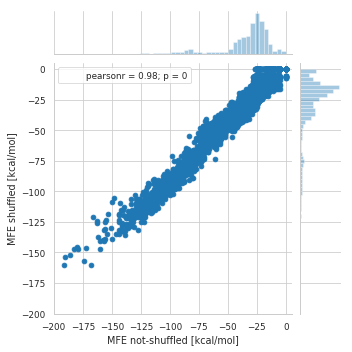

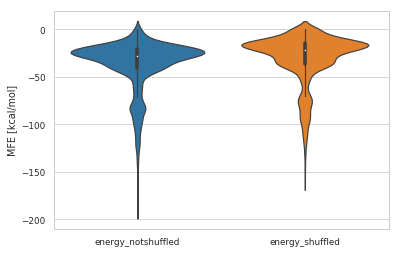

In [22]:
sns.set_context('paper')
g = sns.jointplot(data=df_merge, 
                  x='energy_notshuffled',y='energy_shuffled', height=5,
             xlim=(-200,5), ylim=(-200,5)).set_axis_labels("MFE not-shuffled [kcal/mol]", "MFE shuffled [kcal/mol]")
g = g.annotate(stats.pearsonr)

g.savefig('scatter-plot-MFE.pdf')
plt.show()

sns.set_style('whitegrid')
ax = sns.violinplot(data=df_merge,figsize=(15,5))
ax.set_ylabel('MFE [kcal/mol]')
plt.savefig('violin-plot-MFE.pdf',figsize=(15,5))

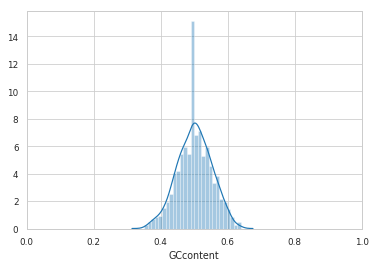

In [23]:
# data obtained by shell command:
# grep ">" -h all_random_len100_gc50.fa | grep "gc" | sed 's/_/\t/g' > all_random_len100_gc50.tsv
df_random = pd.read_csv('all_random_len100_gc50.tsv',sep="\t",names=['id','gcname','GCcontent','lenname','seqlen'])
ax = sns.distplot(df_random.GCcontent)
ax.set_xlim(0,1)
plt.savefig('histogram-GCcontent-artificial-set.pdf')



/home/milad/miniconda3/envs/LocalAlignment/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


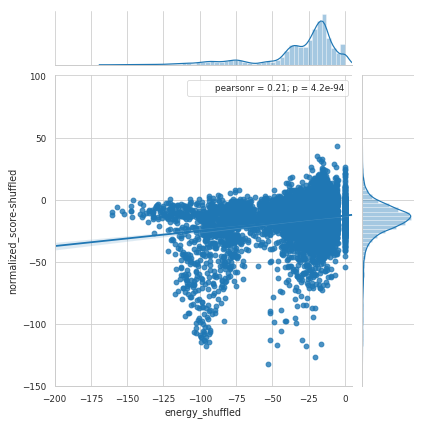

In [18]:
df_benchmarkpilot_shuffled = pd.read_csv('./df_globale_sw_shuffled_loc_2_6_sw200.tsv','\t')
df_benchmarkpilot_shuffled['normalized_score'] = df_benchmarkpilot_shuffled['locarnascore']/df_benchmarkpilot_shuffled['sum_seq_length']
df_benchmarkpilot_shuffled = df_benchmarkpilot_shuffled.add_suffix('-shuffled')

df_merge_benchmrakpilot_shuffled_rnafold = pd.merge(df_benchmarkpilot_shuffled,df_merge,
                                                    left_on='fasta_name-shuffled',right_on='fasta_name',
                                                    )

# sns.jointplot(data=df_merge_benchmrakpilot_shuffled_rnafold, x='energy_shuffled',y='locarnascore-shuffled',)
g = sns.jointplot(data=df_merge_benchmrakpilot_shuffled_rnafold, kind = 'reg',
                  x='energy_shuffled',y='normalized_score-shuffled',
             xlim=(-200,5), ylim=(-150,100))
g = g.annotate(stats.pearsonr)
plt.savefig('./scatter-plot-MFE-score-shuffled.pdf')

In [7]:
df_benchmarkpilot_shuffled.head()

,Unnamed: 0-shuffled,Tool-shuffled,APSI-shuffled,SPI-shuffled,SPS-shuffled,locarnascore-shuffled,sum_seq_length-shuffled,structureWeight-shuffled,BPP(pair)-shuffled,BPP(prog)-shuffled,usrTime-shuffled,SysTime-shuffled,RealTime-shuffled,name-shuffled,mlocarnaCall-shuffled,fasta_name-shuffled,normalized_score-shuffled
0,179540,MLocarna/locarnaN,68,93,-1.0,-2902.0,223.0,200,0,0,0.37,0.16,1.30,/scratch/bi01/miladim/Teresa/Bralibase-GlobalA...,/scratch/bi01/muellert/conda_installation/mini...,5S_rRNA.apsi-68.sci-93.no-1.raw.fa,-13.013453
1,179541,MLocarna/locarnaN,81,99,-1.0,-1220.0,74.0,200,0,0,0.23,0.11,3.74,/scratch/bi01/miladim/Teresa/Bralibase-GlobalA...,/scratch/bi01/muellert/conda_installation/mini...,HCV_SLIV.apsi-81.sci-99.no-3.raw.fa,-16.486486
2,179542,MLocarna/locarnaN,85,90,-1.0,-3955.0,168.0,200,0,0,0.30,0.17,1.68,/scratch/bi01/miladim/Teresa/Bralibase-GlobalA...,/scratch/bi01/muellert/conda_installation/mini...,HIV_GSL3.apsi-85.sci-90.no-3.raw.fa,-23.541667
3,179543,MLocarna/locarnaN,44,108,-1.0,-806.0,146.0,200,0,0,0.30,0.13,1.27,/scratch/bi01/miladim/Teresa/Bralibase-GlobalA...,/scratch/bi01/muellert/conda_installation/mini...,tRNA.apsi-44.sci-108.no-7.raw.fa,-5.520548
4,179544,MLocarna/locarnaN,68,77,-1.0,-4369.0,206.0,200,0,0,0.34,0.10,0.89,/scratch/bi01/miladim/Teresa/Bralibase-GlobalA...,/scratch/bi01/muellert/conda_installation/mini...,S_box.apsi-68.sci-77.no-1.raw.fa,-21.208738


/home/milad/miniconda3/envs/LocalAlignment/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


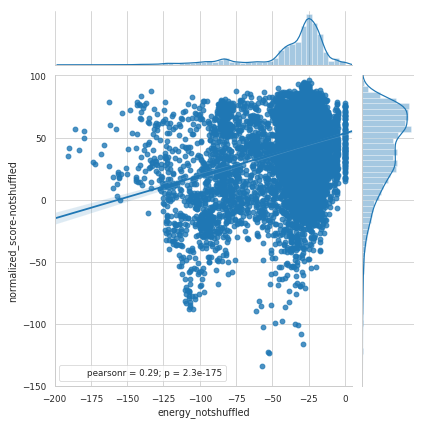

In [19]:
df_benchmarkpilot_notshuffled = pd.read_csv('./df_globale_sw200.tsv','\t')
df_benchmarkpilot_notshuffled['fasta_name'] = df_benchmarkpilot_notshuffled['name'].str.split('/',expand=True)[10]
df_benchmarkpilot_notshuffled['normalized_score'] = df_benchmarkpilot_notshuffled['locarnascore']/df_benchmarkpilot_notshuffled['sum_seq_length']
df_benchmarkpilot_notshuffled = df_benchmarkpilot_notshuffled.add_suffix('-notshuffled')

df_merge_benchmrakpilot_notshuffled_rnafold = pd.merge(df_benchmarkpilot_notshuffled,df_merge,
                                                    left_on='fasta_name-notshuffled',right_on='fasta_name',
                                                    )

# sns.jointplot(data=df_merge_benchmrakpilot_notshuffled_rnafold, x='energy_notshuffled',y='locarnascore-notshuffled',)
g = sns.jointplot(data=df_merge_benchmrakpilot_notshuffled_rnafold, kind="reg",
              x='energy_notshuffled',y='normalized_score-notshuffled',
             xlim=(-200,5), ylim=(-150,100))
g = g.annotate(stats.pearsonr)
plt.savefig('./scatter-plot-MFE-score-notshuffled.pdf')

In [14]:
stats.pearsonr?